## 1. Create the following dataset (1 point)

* One column per stock and concept: Open, High, Low, Close, Adj close per stock
* Date as index

Be ready for dealing with errors in the names and some missing values.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [136]:
df = pd.read_csv("stocks_unclean.csv", index_col ='date', parse_dates=True)

df

,variable,value
date,,
2020-07-14,high_AAPL,9.725500e+01
2021-10-22,volume_AMZN,3.139100e+06
2021-06-04,volume_MSFT,2.528110e+07
2021-06-28,volume_AMZN,2.242800e+06
2021-11-23,low_GOOG,NaN
...,...,...
2020-07-17,volume_MSFT,3.163530e+07
2020-01-27,low_AAPL,7.622000e+01
2021-05-11,high_GOOG,2.322000e+03


In [137]:
df.dtypes

variable     object
value       float64
dtype: object

In [138]:
df_clean = df.pivot_table(columns='variable', index='date',values = 'value')

In [139]:
#cleaning
df_clean = df.pivot_table(columns='variable', index='date',values = 'value')
df_clean = df_clean.loc[:, [col for col in df_clean.columns if 'volume' not in col]]
percentage = 20
minimum = int(((100-percentage)/100)*df_clean.shape[0] + 1)
df_clean = df_clean.dropna(axis=1, thresh= minimum)
df_clean

variable,close_AAPL,close_AMZN,close_GOOG,close_MSFT,high_AAPL,high_AMZN,high_GOOG,high_MSFT,low_AAPL,low_AMZN,low_GOOG,low_MSFT,open_AAPL,open_AMZN,open_GOOG,open_MSFT
date,,,,,,,,,,,,,,,,
2019-12-31,73.412498,1847.839966,1337.020020,157.699997,73.419998,NaN,1338.000000,157.770004,72.379997,1832.229980,1329.084961,156.449997,72.482498,1842.000000,1330.109985,156.770004
2020-01-02,75.087502,1898.010010,1367.369995,160.619995,75.150002,1898.010010,1368.140015,160.729996,73.797501,1864.150024,1341.550049,158.330002,NaN,1875.000000,1341.550049,158.779999
2020-01-03,74.357498,1874.969971,1360.660034,158.619995,75.144997,1886.199951,1372.500000,159.949997,74.125000,1864.500000,1345.543945,NaN,74.287498,1864.500000,1347.859985,158.320007
2020-01-06,74.949997,1902.880005,1394.209961,159.029999,74.989998,1903.689941,1396.500000,159.100006,73.187500,1860.000000,NaN,156.509995,73.447502,1860.000000,1350.000000,157.080002
2020-01-07,74.597504,1906.859985,1393.339966,157.580002,75.224998,1913.890015,1402.989990,159.669998,74.370003,1892.040039,1390.380005,157.320007,74.959999,1904.500000,1397.939941,159.320007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,166.229996,3125.979980,2713.040039,303.329987,NaN,3185.000000,2767.989990,313.910004,165.940002,3125.000000,2710.000000,302.700012,170.000000,3175.239990,2738.770020,306.290009
2022-01-20,164.509995,3033.350098,2670.129883,301.600006,169.679993,3160.000000,2758.239990,311.649994,164.179993,3027.020020,2662.889893,301.140015,166.979996,3135.320068,2730.280029,309.070007
2022-01-21,NaN,2852.860107,2601.840088,296.029999,166.330002,3018.000000,2695.209961,304.109985,162.300003,2841.409912,2600.020020,295.609985,164.419998,2999.000000,2660.239990,302.690002


In [140]:
df2 = df_clean.loc[:, [col for col in df_clean.columns if 'delta' not in col]]
df2

variable,close_AAPL,close_AMZN,close_GOOG,close_MSFT,high_AAPL,high_AMZN,high_GOOG,high_MSFT,low_AAPL,low_AMZN,low_GOOG,low_MSFT,open_AAPL,open_AMZN,open_GOOG,open_MSFT
date,,,,,,,,,,,,,,,,
2019-12-31,73.412498,1847.839966,1337.020020,157.699997,73.419998,NaN,1338.000000,157.770004,72.379997,1832.229980,1329.084961,156.449997,72.482498,1842.000000,1330.109985,156.770004
2020-01-02,75.087502,1898.010010,1367.369995,160.619995,75.150002,1898.010010,1368.140015,160.729996,73.797501,1864.150024,1341.550049,158.330002,NaN,1875.000000,1341.550049,158.779999
2020-01-03,74.357498,1874.969971,1360.660034,158.619995,75.144997,1886.199951,1372.500000,159.949997,74.125000,1864.500000,1345.543945,NaN,74.287498,1864.500000,1347.859985,158.320007
2020-01-06,74.949997,1902.880005,1394.209961,159.029999,74.989998,1903.689941,1396.500000,159.100006,73.187500,1860.000000,NaN,156.509995,73.447502,1860.000000,1350.000000,157.080002
2020-01-07,74.597504,1906.859985,1393.339966,157.580002,75.224998,1913.890015,1402.989990,159.669998,74.370003,1892.040039,1390.380005,157.320007,74.959999,1904.500000,1397.939941,159.320007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,166.229996,3125.979980,2713.040039,303.329987,NaN,3185.000000,2767.989990,313.910004,165.940002,3125.000000,2710.000000,302.700012,170.000000,3175.239990,2738.770020,306.290009
2022-01-20,164.509995,3033.350098,2670.129883,301.600006,169.679993,3160.000000,2758.239990,311.649994,164.179993,3027.020020,2662.889893,301.140015,166.979996,3135.320068,2730.280029,309.070007
2022-01-21,NaN,2852.860107,2601.840088,296.029999,166.330002,3018.000000,2695.209961,304.109985,162.300003,2841.409912,2600.020020,295.609985,164.419998,2999.000000,2660.239990,302.690002


## 2. Visualize the data (1.5 point)

* Create a 2x2 grid of plots in which you plot the "Open" in green and "Close" in red for each stock (0.5 points)
* Repeat the 2x2 grid but resampling with the weekly average of "Open" and "Close" (0.5 points)
* Add meaningful visualizations of your choice (0.5 point)

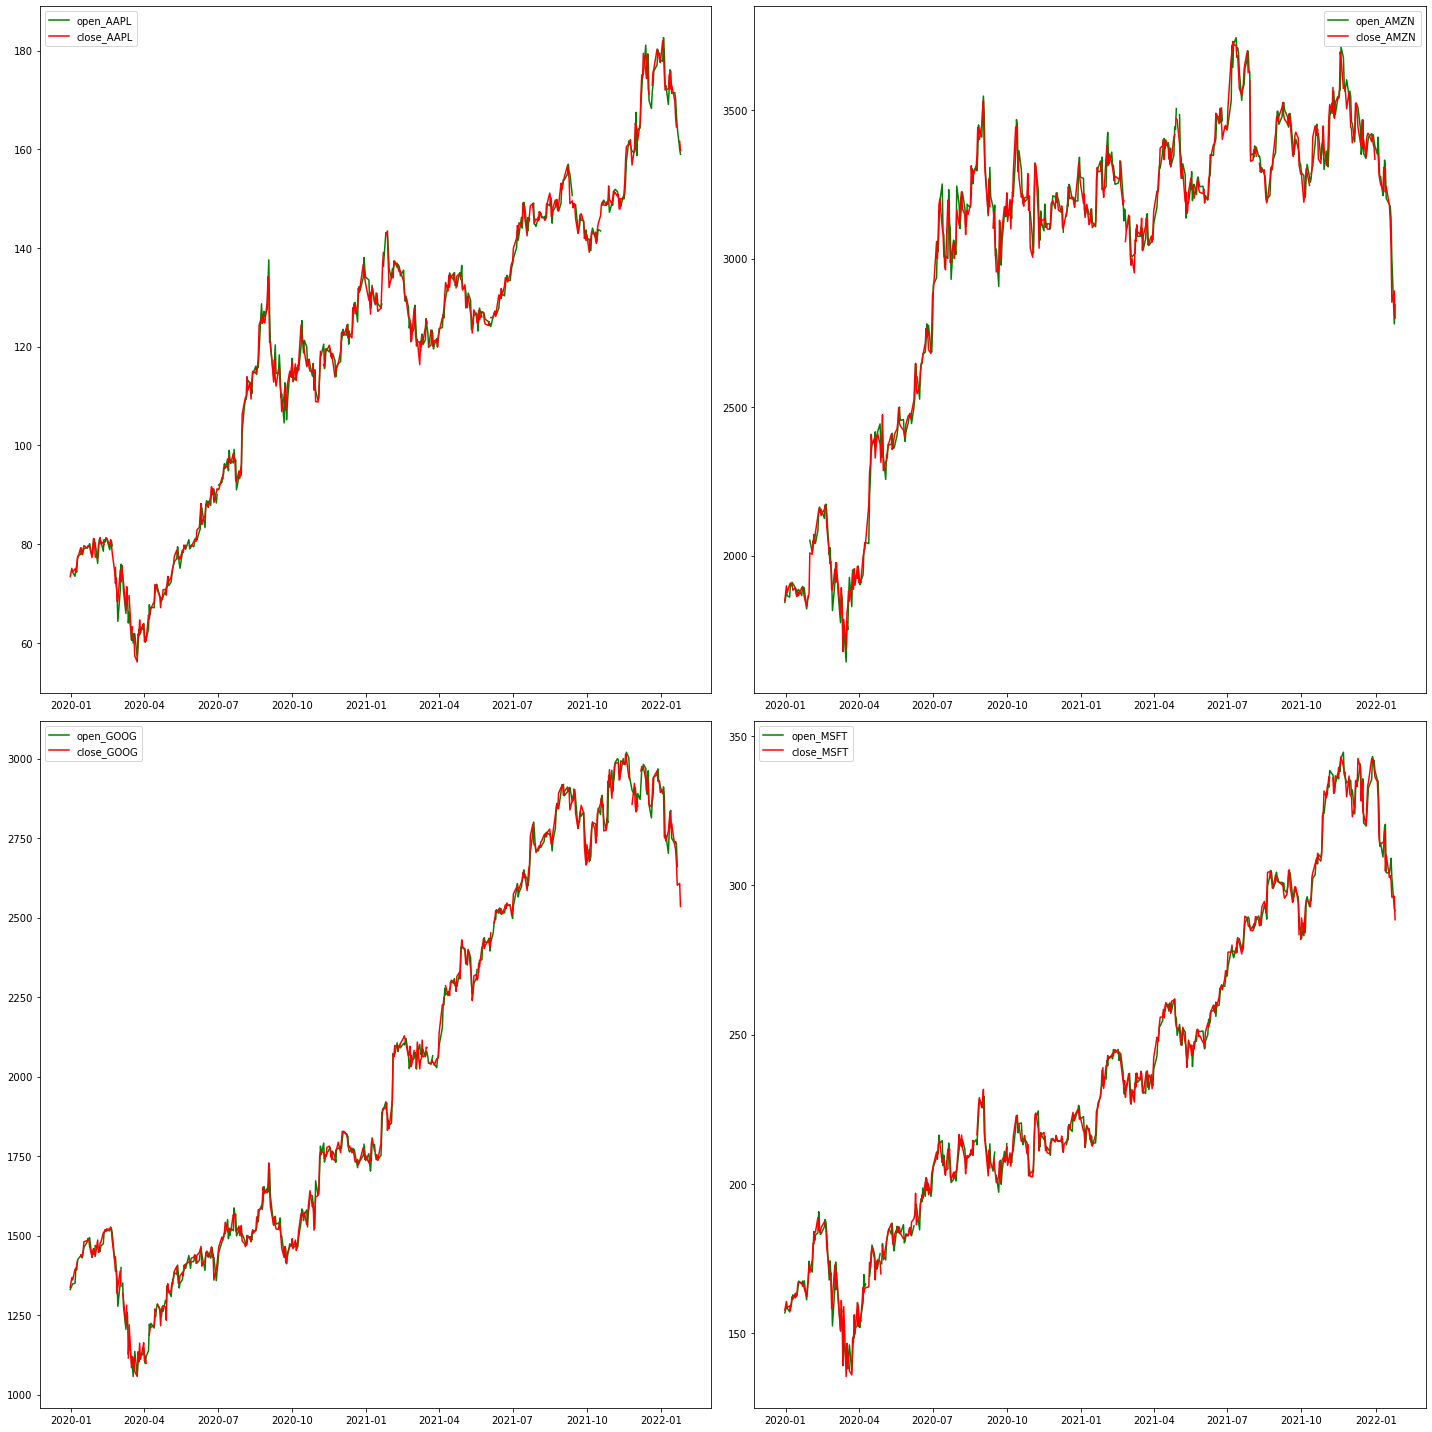

In [141]:
open_AAPL = df2['open_AAPL']
open_AMZN = df2['open_AMZN']
open_GOOG = df2['open_GOOG']
open_MSFT = df2['open_MSFT']

close_AAPL = df2['close_AAPL']
close_AMZN = df2['close_AMZN']
close_MSFT = df2['close_MSFT']
close_GOOG = df2['close_GOOG']

figure, axes = plt.subplots(2, 2, figsize=(20, 20))

axes[0,0].plot(open_AAPL.index, open_AAPL, color='green', label='open_AAPL')
axes[0,0].plot(close_AAPL.index, close_AAPL, color='red', label='close_AAPL')
axes[0,0].legend()

axes[0,1].plot(open_AMZN.index, open_AMZN, color='green', label='open_AMZN')
axes[0,1].plot(close_AMZN.index, close_AMZN, color="red", label='close_AMZN')
axes[0,1].legend()

axes[1,0].plot(open_GOOG.index, open_GOOG, color='green', label='open_GOOG')
axes[1,0].plot(close_GOOG.index, close_GOOG, color='red', label='close_GOOG')
axes[1,0].legend()

axes[1,1].plot(open_MSFT.index, open_MSFT, color='green', label='open_MSFT')
axes[1,1].plot(close_MSFT.index, close_MSFT, color='red', label='close_MSFT')
axes[1,1].legend()

figure.tight_layout()

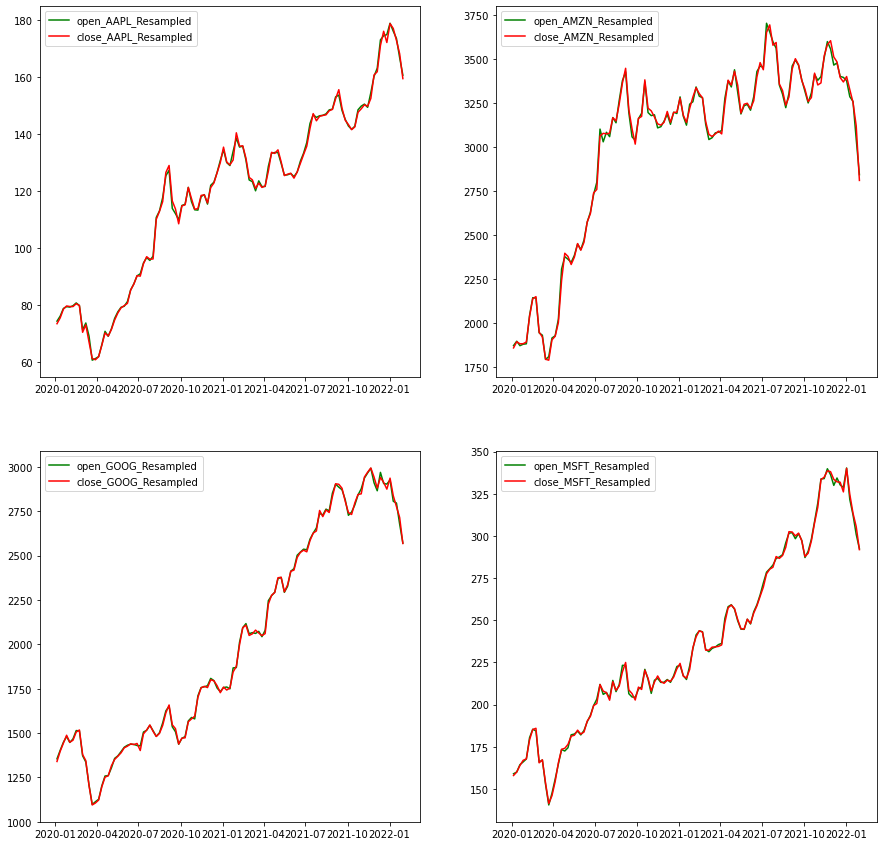

In [142]:
#Resample with average weekly
close_AAPL_resampled = close_AAPL.resample('W').mean()  
open_AAPL_resampled = open_AAPL.resample('W').mean()

close_AMZN_resampled= close_AMZN.resample('W').mean()  
open_AMZN_resampled = open_AMZN.resample('W').mean()

close_MSFT_resampled = close_MSFT.resample('W').mean()  
open_MSFT_resampled = open_MSFT.resample('W').mean()

close_GOOG_resampled= close_GOOG.resample('W').mean()  
open_GOOG_resampled = open_GOOG.resample('W').mean()


figure, axes = plt.subplots(2,2, figsize=(15, 15))

axes[0,0].plot(open_AAPL_resampled.index, close_AAPL_resampled, color='green', label='open_AAPL_Resampled')
axes[0,0].plot(close_AAPL_resampled.index, open_AAPL_resampled, color='red', label='close_AAPL_Resampled')
axes[0,0].legend()

axes[0,1].plot(open_AMZN_resampled.index, close_AMZN_resampled, color='green', label='open_AMZN_Resampled')
axes[0,1].plot(close_AMZN_resampled.index, open_AMZN_resampled, color='red', label='close_AMZN_Resampled')
axes[0,1].legend()

axes[1,0].plot(open_GOOG_resampled.index, close_GOOG_resampled, color='green', label='open_GOOG_Resampled')
axes[1,0].plot(close_GOOG_resampled.index, open_GOOG_resampled, color='red', label='close_GOOG_Resampled')
axes[1,0].legend()

axes[1,1].plot(open_MSFT_resampled.index, close_MSFT_resampled, color='green', label='open_MSFT_Resampled')
axes[1,1].plot(close_MSFT_resampled.index, open_MSFT_resampled, color='red', label='close_MSFT_Resampled')
axes[1,1].legend()

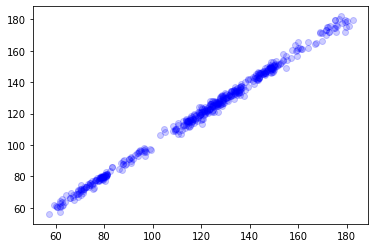

In [143]:
x = open_AAPL
y = close_AAPL

def plot_corr(x, y, text_pos=(-2, 1)):
    plt.scatter(x, y, alpha=0.2, c="blue")
    plt.show()
    
plot_corr(x, y, (2,1))

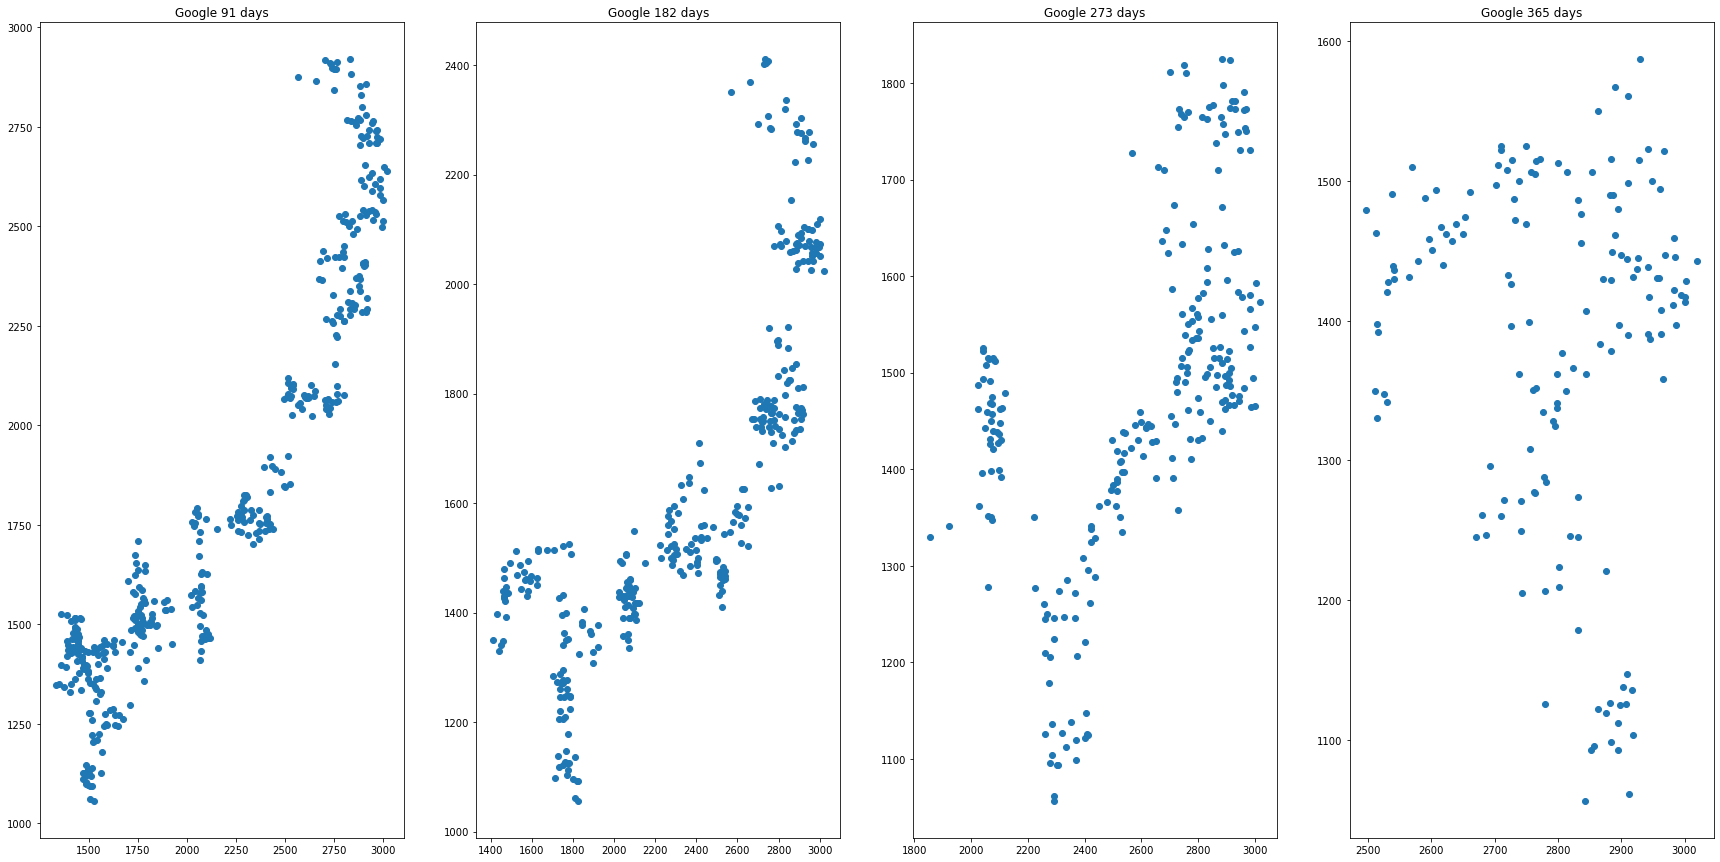

In [144]:

figure, axes = plt.subplots(1, 4, figsize=(30,15))
days = [91,182,273,365]

for i, axes in enumerate(axes.ravel()):
    axes.scatter(open_GOOG,open_GOOG.shift(days[i]) )
    axes.set_title("Google {} days".format(days[i]))


## 3. Create a function that calculates the Return of Investment (ROI) (1 point)

Let's suppose you buy one stock one day, you hold it for N days (lookback period) and after N days you sell it.

$$ ROI = \frac{FVI - IVI}{IVI} * 100$$

* IVI: initial value of investment. This is the price at which you bought the stock
* FVI: final value of investment. This is the price at which you sold the stock
* ROI: Return of Investment. This is the percentage of increase in value of the investment

Now that we know how to calculate the ROI, create a function in Python that receives as parameters the following:
* lookback: the number of days you hold the stock
* name: the name of the stock, using the "Close" value of the stock
* data: the dataframe with the stock data

In [145]:
def ROI(lookback,name,data):
    data = data[name]
    ROI = 100 * (data/data.shift(lookback)-1)
    return ROI


## 4. Apply the roi function to the portfolio (1.5 point)

Create as many ROI columns as different stocks you have in the portfolio and plot them in a 2x2 grid, representing for each stock:
* ROI after holding the stock for 365 days (red, dashed line) (0.5 points)
* ROI after holding the stock for 180 days (blue, dotted line) (0.5 points)
* ROI after holding the stock for 90 days (green, solid line) (0.5 points)

In [146]:
df3 = df2.loc[:,[col for col in df2 if 'close' in col]]
df4 = df3.loc[:, [col for col in df3 if not 'adj_close' in col]]
df4

variable,close_AAPL,close_AMZN,close_GOOG,close_MSFT
date,,,,
2019-12-31,73.412498,1847.839966,1337.020020,157.699997
2020-01-02,75.087502,1898.010010,1367.369995,160.619995
2020-01-03,74.357498,1874.969971,1360.660034,158.619995
2020-01-06,74.949997,1902.880005,1394.209961,159.029999
2020-01-07,74.597504,1906.859985,1393.339966,157.580002
...,...,...,...,...
2022-01-19,166.229996,3125.979980,2713.040039,303.329987
2022-01-20,164.509995,3033.350098,2670.129883,301.600006
2022-01-21,NaN,2852.860107,2601.840088,296.029999


In [147]:
#Add columns for Return on Inv for holding stocks different times
df4['ROI_AAPL_90'] = ROI(90,'close_AAPL',df4)
df4['ROI_AAPL_180'] = ROI(180,'close_AAPL',df4)
df4['ROI_AAPL_365'] = ROI(365,'close_AAPL',df4)

df4['ROI_GOOG_90'] = ROI(90,'close_GOOG',df4)
df4['ROI_GOOG_180'] = ROI(180,'close_GOOG',df4)
df4['ROI_GOOG_365'] = ROI(365,'close_GOOG',df4)

df4['ROI_AMZN_90'] = ROI(90,'close_AMZN',df4)
df4['ROI_AMZN_180'] = ROI(180,'close_AMZN',df4)
df4['ROI_AMZN_365'] = ROI(365,'close_AMZN',df4)

df4['ROI_MSFT_90'] = ROI(90,'close_MSFT',df4)
df4['ROI_MSFT_180'] = ROI(180,'close_MSFT',df4)
df4['ROI_MSFT_365'] = ROI(365,'close_MSFT',df4)

df4

variable,close_AAPL,close_AMZN,close_GOOG,close_MSFT,ROI_AAPL_90,ROI_AAPL_180,ROI_AAPL_365,ROI_GOOG_90,ROI_GOOG_180,ROI_GOOG_365,ROI_AMZN_90,ROI_AMZN_180,ROI_AMZN_365,ROI_MSFT_90,ROI_MSFT_180,ROI_MSFT_365
date,,,,,,,,,,,,,,,,
2019-12-31,73.412498,1847.839966,1337.020020,157.699997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,75.087502,1898.010010,1367.369995,160.619995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,74.357498,1874.969971,1360.660034,158.619995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,74.949997,1902.880005,1394.209961,159.029999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,74.597504,1906.859985,1393.339966,157.580002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,166.229996,3125.979980,2713.040039,303.329987,11.586222,30.019552,49.605122,-4.417242,15.240099,81.536180,-9.892047,-5.612845,-1.309566,2.576847,22.414139,42.756962
2022-01-20,164.509995,3033.350098,2670.129883,301.600006,10.003337,28.423097,45.935990,-6.941420,13.297602,78.472691,-12.259155,-7.252317,-3.646886,1.552246,22.367836,44.825933
2022-01-21,NaN,2852.860107,2601.840088,296.029999,NaN,NaN,NaN,-9.284131,9.259033,75.762010,-17.308403,-13.716251,-7.394814,-1.254215,18.540025,45.555114


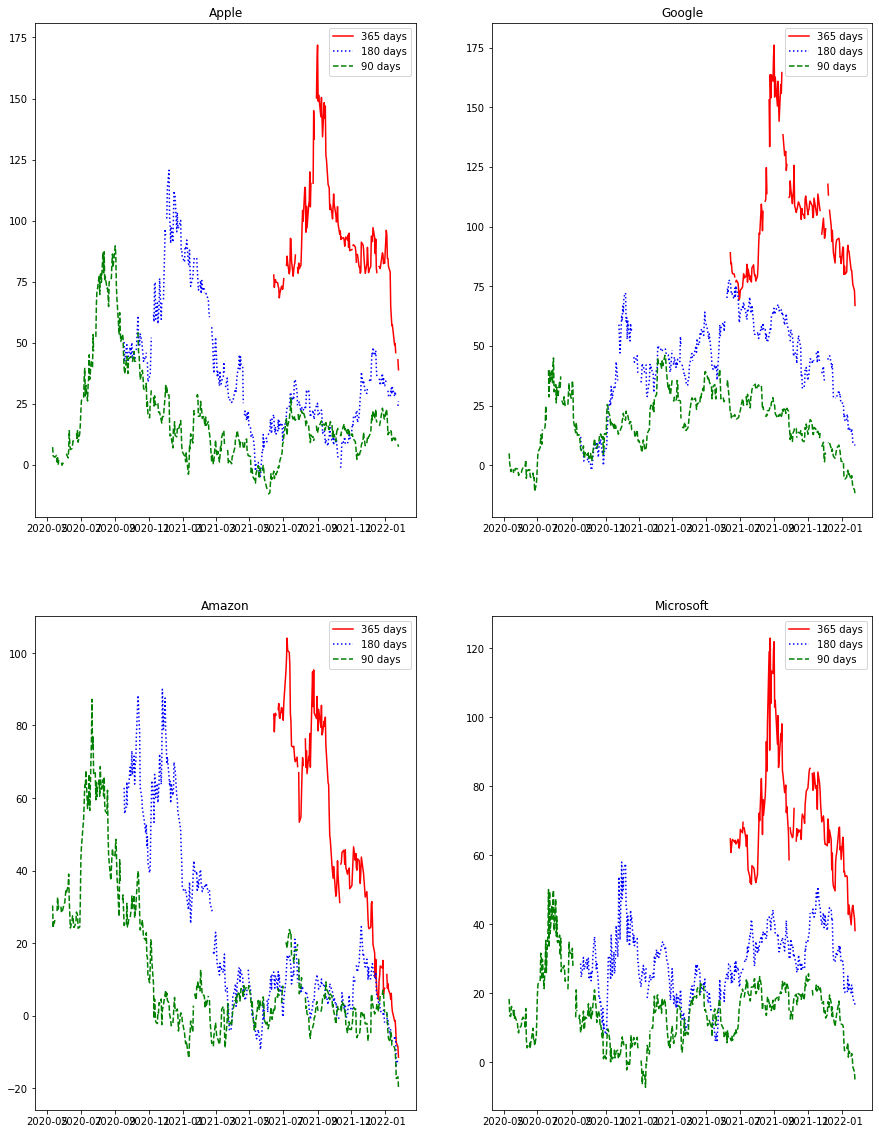

In [148]:
 

figure, axes = plt.subplots(2,2,figsize=(15,20))

axes[0,0].plot(df4['ROI_AAPL_365'].index,df4['ROI_AAPL_365'], label='365 days', c='red', linestyle='solid')
axes[0,0].plot(df4['ROI_AAPL_180'].index,df4['ROI_AAPL_180'], label='180 days', c='blue', linestyle='dotted')
axes[0,0].plot(df4['ROI_AAPL_90'].index,df4['ROI_AAPL_90'], label='90 days', c='green', linestyle='--')
axes[0,0].set_title("Apple")
axes[0,0].legend()

axes[0,1].plot(df4['ROI_GOOG_365'].index,df4['ROI_GOOG_365'], label='365 days', c='red', linestyle='solid')
axes[0,1].plot(df4['ROI_GOOG_180'].index,df4['ROI_GOOG_180'], label='180 days', c='blue', linestyle='dotted')
axes[0,1].plot(df4['ROI_GOOG_90'].index,df4['ROI_GOOG_90'], label='90 days', c='green', linestyle='--')
axes[0,1].set_title("Google")
axes[0,1].legend()

axes[1,0].plot(df4['ROI_AMZN_365'].index,df4['ROI_AMZN_365'], label='365 days', c='red', linestyle='solid')
axes[1,0].plot(df4['ROI_AMZN_180'].index,df4['ROI_AMZN_180'], label='180 days', c='blue', linestyle='dotted')
axes[1,0].plot(df4['ROI_AMZN_90'].index,df4['ROI_AMZN_90'], label='90 days', c='green', linestyle='--')
axes[1,0].set_title("Amazon")
axes[1,0].legend()

axes[1,1].plot(df4['ROI_MSFT_365'].index,df4['ROI_MSFT_365'], label='365 days', c='red', linestyle='solid')
axes[1,1].plot(df4['ROI_MSFT_180'].index,df4['ROI_MSFT_180'], label='180 days', c='blue', linestyle='dotted')
axes[1,1].plot(df4['ROI_MSFT_90'].index,df4['ROI_MSFT_90'], label='90 days', c='green', linestyle='--')
axes[1,1].set_title("Microsoft")
axes[1,1].legend()

## 5. Optimizing portfolio (1 point)

Given these two portfolios, which one has the best ROI? Keep in mind that ROI is a percentage and you can't average it directly -- you need to convert the ROI to a return in currency by multiplying it by the buy price, and then average that over the period.

* Portfolio 1:
    * AAPL 40%
    * GOOG 30%
    * MSFT 20%
    * AMZN 10%


* Portfolio 2:
    * AAPL 30%
    * GOOG 20%
    * MSFT 10%
    * AMZN 40%

In [149]:
df4['ROI_AAPL_365'] = (df4['ROI_AAPL_365']/100)*close_AAPL.shift(365)
df4['ROI_AAPL_180'] = (df4['ROI_AAPL_180']/100)*close_AAPL.shift(180)
df4['ROI_AAPL_90'] = (df4['ROI_AAPL_90']/100)*close_AAPL.shift(90)

df4['ROI_GOOG_365'] = (df4['ROI_GOOG_365']/100)*close_GOOG.shift(365)
df4['ROI_GOOG_180'] = (df4['ROI_GOOG_180']/100)*close_GOOG.shift(180)
df4['ROI_GOOG_90'] = (df4['ROI_GOOG_90']/100)*close_GOOG.shift(90)

df4['ROI_AMZN_365'] = (df4['ROI_AMZN_365']/100)*close_AMZN.shift(365)
df4['ROI_AMZN_180'] = (df4['ROI_AMZN_180']/100)*close_AMZN.shift(180)
df4['ROI_AMZN_90'] = (df4['ROI_AMZN_90']/100)*close_AMZN.shift(90)

df4['ROI_MSFT_365'] = (df4['ROI_MSFT_365']/100)*close_MSFT.shift(365)
df4['ROI_MSFT_180'] = (df4['ROI_MSFT_180']/100)*close_MSFT.shift(180)
df4['ROI_MSFT_90'] = (df4['ROI_MSFT_90']/100)*close_MSFT.shift(90)
df4

variable,close_AAPL,close_AMZN,close_GOOG,close_MSFT,ROI_AAPL_90,ROI_AAPL_180,ROI_AAPL_365,ROI_GOOG_90,ROI_GOOG_180,ROI_GOOG_365,ROI_AMZN_90,ROI_AMZN_180,ROI_AMZN_365,ROI_MSFT_90,ROI_MSFT_180,ROI_MSFT_365
date,,,,,,,,,,,,,,,,
2019-12-31,73.412498,1847.839966,1337.020020,157.699997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,75.087502,1898.010010,1367.369995,160.619995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,74.357498,1874.969971,1360.660034,158.619995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,74.949997,1902.880005,1394.209961,159.029999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,74.597504,1906.859985,1393.339966,157.580002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,166.229996,3125.979980,2713.040039,303.329987,17.259995,38.379997,55.117493,-125.379883,358.790039,1218.550049,-343.169922,-185.890137,-41.479980,7.619995,55.539993,90.849991
2022-01-20,164.509995,3033.350098,2670.129883,301.600006,14.959991,36.409988,51.782494,-199.170166,313.389893,1174.029907,-423.819824,-237.189941,-114.809814,4.610016,55.130005,93.350006
2022-01-21,NaN,2852.860107,2601.840088,296.029999,NaN,NaN,NaN,-266.280029,220.489990,1121.520142,-597.139893,-453.510010,-227.809814,-3.760010,46.300003,92.649994


In [150]:
#1 
ROI_365 = ((df4['ROI_AAPL_365'].mean())*0.4 + (df4['ROI_GOOG_365'].mean())*0.3 + (df4['ROI_MSFT_365'].mean())*0.2 +(df4['ROI_AMZN_365'].mean())*0.1)

print(f"The results or portfolio 1 with 365 days is:{ROI_365}")

The results or portfolio 1 with 365 days is:580.2908459183983


In [151]:
ROI_180 = ((df4['ROI_AAPL_180'].mean())*0.4 + (df4['ROI_GOOG_180'].mean())*0.3 + (df4['ROI_MSFT_180'].mean())*0.2 +(df4['ROI_AMZN_180'].mean())*0.1)
print(f"The results or portfolio 1 with 180 days: {ROI_180}")

The results or portfolio 1 with 180 days: 284.64290338090814


In [152]:
ROI_90 = ((df4['ROI_AAPL_90'].mean())*0.4   + (df4['ROI_GOOG_90'].mean())*0.3 + (df4['ROI_MSFT_90'].mean())*0.2   + (df4['ROI_AMZN_90'].mean())*0.1)
print(f"The results or portfolio 1 with 90 days: {ROI_90}")

The results or portfolio 1 with 90 days: 136.6158415019975


In [153]:
#2 
ROI_365 = ((df4['ROI_AAPL_365'].mean())*0.3 + (df4['ROI_GOOG_365'].mean())*0.2 +  (df4['ROI_MSFT_365'].mean())*0.1 + (df4['ROI_AMZN_365'].mean())*0.4 )

print(f"The result for with the portfolio 2 for 365 days is:{ROI_365}")

The result for with the portfolio 2 for 365 days is:735.7528016651931


In [154]:
ROI_180 = ((df4['ROI_AAPL_180'].mean())*0.3 + (df4['ROI_GOOG_180'].mean())*0.2 +  (df4['ROI_MSFT_180'].mean())*0.1 +  (df4['ROI_AMZN_180'].mean())*0.4)  
print(f"The result for with the portfolio 2 for 180 days is:{ROI_180}") 

The result for with the portfolio 2 for 180 days is:351.3866632491895


In [155]:
ROI_90 = ((df4['ROI_AAPL_90'].mean())*0.3 + (df4['ROI_GOOG_90'].mean())*0.2 + (df4['ROI_MSFT_90'].mean())*0.1 + (df4['ROI_AMZN_90'].mean())*0.4)
print(f"The result for with the portfolio 2 for 90 days is:{ROI_90}") 

The result for with the portfolio 2 for 90 days is:184.85476119631585


In [156]:
#Portfolio 2 seems to do better in all time frames in regards to the payout

## 6. Find a better combination in your portfolio (1 point)

The new combination should beat the best portfolio that you found in the previous exercise.

In [157]:
ROI_new_365 = ((df4['ROI_AAPL_365'].mean())*0.1 + (df4['ROI_GOOG_365'].mean())*0.3 +  (df4['ROI_MSFT_365'].mean())*0.1 + (df4['ROI_AMZN_365'].mean())*0.5 )
print(f"The result for optimized portfolio for 365 days is:{ROI_new_365}")

The result for optimized portfolio for 365 days is:966.8446411553876


In [158]:
ROI_new_180 = ((df4['ROI_AAPL_180'].mean())*0.1 + (df4['ROI_GOOG_180'].mean())*0.3+  (df4['ROI_MSFT_180'].mean())*0.1 +  (df4['ROI_AMZN_180'].mean())*0.5)  
print(f"The result for optimized portfolio for 180 days is:{ROI_new_180}")

The result for optimized portfolio for 180 days is:463.6693056775009


In [159]:
ROI_new_90 =  ((df4['ROI_AAPL_90'].mean())*0.1 + (df4['ROI_GOOG_90'].mean())*0.3 + (df4['ROI_MSFT_90'].mean())*0.1 + (df4['ROI_AMZN_90'].mean())*0.5)
print(f"The result for optimized portfolio for 90 days is:{ROI_new_90}")


The result for optimized portfolio for 90 days is:241.1013909953093
